In [1]:
%pip install esda

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 132 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 186 kB 10.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install ee
%pip install geemap
%pip install geopandas
%pip install geopy
%pip install folium
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install rasterio
%pip install seaborn
%pip install shapely
%pip install sklearn
%pip install 


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for ee: filename=ee-0.2-py3-none-any.whl size=3674 sha256=791157761495d778eb549f43acf5338f094cec53dd52d53fa60139cc39b1f7f1
  Stored in directory: /Users/sarahheinz/Library/Caches/pip/wheels/0d/6c/c0/f17fb105d1ad88aa5aff8067de0ebf7e141ea81f0df52535b9
Successfully built ee
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 12.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.0 MB/s eta 0:00:00
  

In [8]:
# Bibliotheken installieren und Zugriffe gewähren
import ee
import geemap
import folium
from datetime import datetime
import geopandas as gpd
from shapely.geometry import mapping
from shapely.geometry import Point
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import esda
import libpysal as lps


ee.Authenticate()
ee.Initialize(project="ee-sarahheinz0405")

from google.colab import drive
drive.mount('/content/drive')


/Users/sarahheinz/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Matplotlib is building the font cache; this may take a moment.



Successfully saved authorization token.


ModuleNotFoundError: No module named 'google.colab'

# Sommer 2022: Cold Spots identifizieren

In [ ]:
# CSV-Dateien laden (Passe die Dateinamen an)
df_noerdlingen = pd.read_csv("/content/drive/MyDrive/Daten BA /erstellte Dateien mit colab/LST_Noerdlingen_summer2022_5%_with_coords_reexported.csv")
df_kempten = pd.read_csv("/content/drive/MyDrive/Daten BA /erstellte Dateien mit colab/LST_Kempten_summer2022_5%_with_coords.csv")
df_ingolstadt = pd.read_csv("/content/drive/MyDrive/Daten BA /erstellte Dateien mit colab/LST_Ingolstadt_summer2022_5%_with_coords.csv")

# Erste Zeilen anzeigen
print(df_noerdlingen.head())
print(df_kempten.head())
print(df_ingolstadt.head())


   longitude   latitude  system:index  LST_Celsius
0  10.505573  48.795363             0    32.226124
1  10.505842  48.795363             1    32.134692
2  10.506112  48.795363             2    31.939865
3  10.506381  48.795363             3    31.939865
4  10.506651  48.795363             4    31.816816
   longitude   latitude  system:index  LST_Celsius
0  10.317735  47.695286             0    26.112141
1  10.318004  47.695286             1    24.783385
2  10.318274  47.695286             2    25.025210
3  10.318543  47.695286             3    25.025210
4  10.318813  47.695286             4    25.941240
   longitude   latitude  system:index  LST_Celsius
0  11.392749  48.684332             0    35.608255
1  11.393018  48.684332             1    35.538755
2  11.391671  48.684601             2    35.406592
3  11.391940  48.684601             3    35.844098
4  11.392210  48.684601             4    36.087917


In [ ]:
def create_geodataframe(df):
    geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    return gdf

gdf_noerdlingen = create_geodataframe(df_noerdlingen)
gdf_kempten = create_geodataframe(df_kempten)
gdf_ingolstadt = create_geodataframe(df_ingolstadt)

# Prüfen, ob alles funktioniert hat
print(gdf_noerdlingen.head())
print(gdf_kempten.head())
print(gdf_ingolstadt.head())


   longitude   latitude  system:index  LST_Celsius                   geometry
0  10.505573  48.795363             0    32.226124  POINT (10.50557 48.79536)
1  10.505842  48.795363             1    32.134692  POINT (10.50584 48.79536)
2  10.506112  48.795363             2    31.939865  POINT (10.50611 48.79536)
3  10.506381  48.795363             3    31.939865  POINT (10.50638 48.79536)
4  10.506651  48.795363             4    31.816816  POINT (10.50665 48.79536)
   longitude   latitude  system:index  LST_Celsius                   geometry
0  10.317735  47.695286             0    26.112141  POINT (10.31773 47.69529)
1  10.318004  47.695286             1    24.783385    POINT (10.318 47.69529)
2  10.318274  47.695286             2    25.025210  POINT (10.31827 47.69529)
3  10.318543  47.695286             3    25.025210  POINT (10.31854 47.69529)
4  10.318813  47.695286             4    25.941240  POINT (10.31881 47.69529)
   longitude   latitude  system:index  LST_Celsius              

In [ ]:
# räumliche Nachbarschaft definieren
from libpysal.weights import KNN

def create_knn_weights(gdf, k=12):  # KNN mit 12 Nachbarn
    coords = np.array(list(zip(gdf.geometry.x, gdf.geometry.y)))
    w = KNN.from_array(coords, k=k)
    return w

w_noerdlingen = create_knn_weights(gdf_noerdlingen, k=8)
w_kempten = create_knn_weights(gdf_kempten, k=8)
w_ingolstadt = create_knn_weights(gdf_ingolstadt, k=8)


/usr/local/lib/python3.11/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


In [ ]:
# Getis Ord GI* berechnen
from esda.getisord import G_Local

def calculate_hotspots(gdf, w):
    gdf = gdf.copy()  # Kopie, um das Original nicht zu ändern
    g = G_Local(gdf["LST_Celsius"], w)
    gdf["Gi*"] = g.Zs  # Standardisierte Z-Werte
    return gdf

gdf_noerdlingen = calculate_hotspots(gdf_noerdlingen, w_noerdlingen)
gdf_kempten = calculate_hotspots(gdf_kempten, w_kempten)
gdf_ingolstadt = calculate_hotspots(gdf_ingolstadt, w_ingolstadt)


In [ ]:
# Zeige die ersten Zeilen des GeoDataFrames mit der Spalte 'Gi*' an
print(gdf_noerdlingen[["Gi*"]].head())  # Für Nördlingen
print(gdf_kempten[["Gi*"]].head())    # Für Kempten
print(gdf_ingolstadt[["Gi*"]].head())  # Für Ingolstadt

        Gi*
0 -1.745462
1 -1.730315
2 -1.740019
3 -1.777678
4 -1.803722
        Gi*
0 -2.372442
1 -2.323897
2 -2.275390
3 -2.264155
4 -1.992435
        Gi*
0  0.229821
1  0.198500
2  0.191142
3  0.213215
4  0.218155


In [ ]:
# Cold und Hot Spots klassifizieren

def classify_spots(gdf):
    def classify(z):
        if z > 2.58:
            return "Hot Spot (p<0.01)"
        elif z > 1.96:
            return "Hot Spot (p<0.05)"
        elif z > 1.65:
            return "Hot Spot (p<0.10)"
        elif z < -2.58:
            return "Cold Spot (p<0.01)"
        elif z < -1.96:
            return "Cold Spot (p<0.05)"
        elif z < -1.65:
            return "Cold Spot (p<0.10)"
        else:
            return "Neutral"

    gdf["Spot Type"] = gdf["Gi*"].apply(classify)
    return gdf

# Beispielaufruf
gdf_noerdlingen = classify_spots(gdf_noerdlingen)
gdf_kempten = classify_spots(gdf_kempten)
gdf_ingolstadt = classify_spots(gdf_ingolstadt)


In [ ]:
print(gdf_noerdlingen.head())
print(gdf_kempten.head())
print(gdf_ingolstadt.head())

   longitude   latitude  system:index  LST_Celsius                   geometry  \
0  10.505573  48.795363             0    32.226124  POINT (10.50557 48.79536)   
1  10.505842  48.795363             1    32.134692  POINT (10.50584 48.79536)   
2  10.506112  48.795363             2    31.939865  POINT (10.50611 48.79536)   
3  10.506381  48.795363             3    31.939865  POINT (10.50638 48.79536)   
4  10.506651  48.795363             4    31.816816  POINT (10.50665 48.79536)   

        Gi*           Spot Type  
0 -1.745462  Cold Spot (p<0.10)  
1 -1.730315  Cold Spot (p<0.10)  
2 -1.740019  Cold Spot (p<0.10)  
3 -1.777678  Cold Spot (p<0.10)  
4 -1.803722  Cold Spot (p<0.10)  
   longitude   latitude  system:index  LST_Celsius                   geometry  \
0  10.317735  47.695286             0    26.112141  POINT (10.31773 47.69529)   
1  10.318004  47.695286             1    24.783385    POINT (10.318 47.69529)   
2  10.318274  47.695286             2    25.025210  POINT (10.3182

In [ ]:
gdf_noerdlingen.to_csv("Noerdlingen_ColdSpots.csv", index=False)
gdf_kempten.to_csv("Kempten_ColdSpots.csv", index=False)
gdf_ingolstadt.to_csv("Ingolstadt_ColdSpots.csv", index=False)


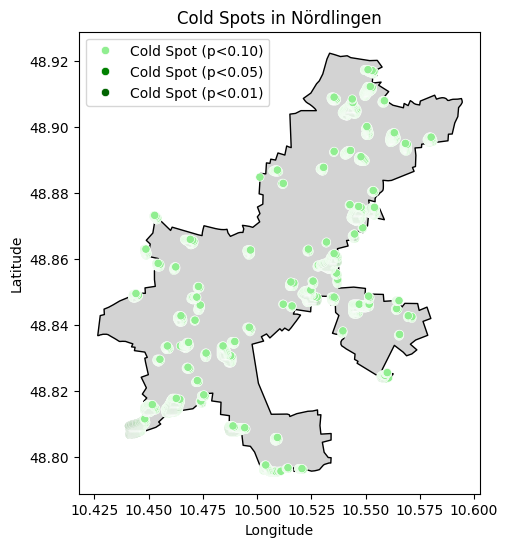

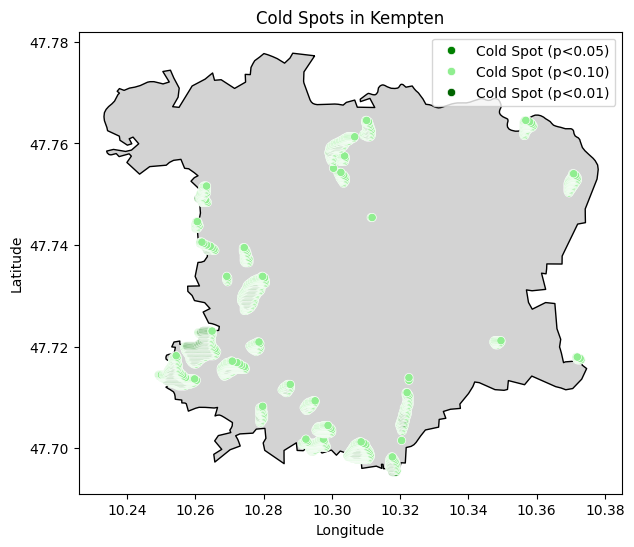

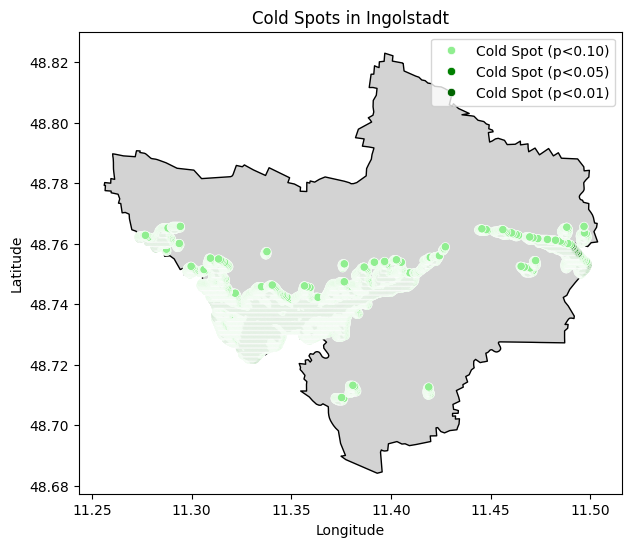

In [ ]:
# 1. Load administrative boundaries (replace with your file paths)
boundary_noerdlingen = gpd.read_file("/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp")
boundary_kempten = gpd.read_file("/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp")
boundary_ingolstadt = gpd.read_file("/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp")

# 2. Ensure CRS consistency
desired_crs = "EPSG:4326"  # Example: WGS 84

# Set the CRS for the GeoDataFrames before transforming
gdf_noerdlingen.crs = 'EPSG:4326'
gdf_kempten.crs = 'EPSG:4326'
gdf_ingolstadt.crs = 'EPSG:4326'


boundary_noerdlingen = boundary_noerdlingen.to_crs(desired_crs)
boundary_kempten = boundary_kempten.to_crs(desired_crs)
boundary_ingolstadt = boundary_ingolstadt.to_crs(desired_crs)
gdf_noerdlingen = gdf_noerdlingen.to_crs(desired_crs)
gdf_kempten = gdf_kempten.to_crs(desired_crs)
gdf_ingolstadt = gdf_ingolstadt.to_crs(desired_crs)


def plot_coldspots_with_boundaries(gdf, boundary_gdf, city_name):
    # Filter for Cold Spots
    coldspots_gdf = gdf[gdf["Spot Type"].str.startswith("Cold Spot")]

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    boundary_gdf.plot(ax=ax, color="lightgray", edgecolor="black")  # Plot boundary
    sns.scatterplot(
        x=coldspots_gdf.geometry.x,
        y=coldspots_gdf.geometry.y,
        hue=coldspots_gdf["Spot Type"],
        palette={
            "Cold Spot (p<0.01)": "darkgreen",
            "Cold Spot (p<0.05)": "green",
            "Cold Spot (p<0.10)": "lightgreen",
        },
        ax=ax,  # Use the same axes for both plots
    )
    plt.title(f"Cold Spots in {city_name}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show()

# Plot for each city
plot_coldspots_with_boundaries(gdf_noerdlingen, boundary_noerdlingen, "Nördlingen")
plot_coldspots_with_boundaries(gdf_kempten, boundary_kempten, "Kempten")
plot_coldspots_with_boundaries(gdf_ingolstadt, boundary_ingolstadt, "Ingolstadt")

Datenpunkte können als Cold Spots verwendet werden und mit LST Karten verglichen werden oder Spalte mit "Cold Spots" in LST Datei hinzugefügt werden für Erreichbarkeitsanalysen

prüfen, wie sich räumliche Ausdehnung der Cold Spots (also addierte Fläche aller Cold Spots), sowie die Anzahl der Cold Spots ändert, wenn man jeweils nur die Spots mit einem z Wert von < -2.58, von < -1.96 und von < -1.65 mit einbezieht

In [ ]:
import geopandas as gpd

def analyze_cold_spots(gdf):
    thresholds = [-2.58, -1.96, -1.65]
    results = []
    for threshold in thresholds:
        cold_spots = gdf[gdf["Gi*"] < threshold]

         # Geometriespalte überprüfen und ggf. erstellen
        if 'geometry' not in cold_spots.columns or cold_spots.geometry.is_empty.any():
            cold_spots['geometry'] = gpd.points_from_xy(cold_spots.longitude, cold_spots.latitude)

        # CRS überprüfen und ggf. setzen
        if cold_spots.crs is None:
            cold_spots.crs = 'epsg:4326'

        # Geometrien in UTM projizieren
        cold_spots = cold_spots.to_crs("EPSG:32632")  # UTM Zone 32N
        num_cold_spots = len(cold_spots)
        total_area = cold_spots.geometry.area.sum()  # in Quadratmetern
        results.append([threshold, num_cold_spots, total_area])

    return pd.DataFrame(results, columns=["Threshold", "Num_Cold_Spots", "Total_Area"])

# Beispielaufruf für Nördlingen
results_noerdlingen = analyze_cold_spots(gdf_noerdlingen)
print("Ergebnisse für Nördlingen:")
print(results_noerdlingen)

# Beispielaufruf für Kempten
results_kempten = analyze_cold_spots(gdf_kempten)
print("\nErgebnisse für Kempten:")
print(results_kempten)

# Beispielaufruf für Ingolstadt
results_ingolstadt = analyze_cold_spots(gdf_ingolstadt)
print("\nErgebnisse für Ingolstadt:")
print(results_ingolstadt)

Ergebnisse für Nördlingen:
   Threshold  Num_Cold_Spots  Total_Area
0      -2.58             186         0.0
1      -1.96            1386         0.0
2      -1.65            3967         0.0

Ergebnisse für Kempten:
   Threshold  Num_Cold_Spots  Total_Area
0      -2.58               1         0.0
1      -1.96             889         0.0
2      -1.65            2907         0.0

Ergebnisse für Ingolstadt:
   Threshold  Num_Cold_Spots  Total_Area
0      -2.58             594         0.0
1      -1.96           10696         0.0
2      -1.65           22537         0.0


kempten nur einer bei -2.58, weil Stadt allgemein eher kühl? Also wenn Mittelwert allgemein kühler, dann sind auch nicht so signifikante Abweichungen davon erkennbar, obwohl Temperaturen sehr kühl sind => nicht offensichtliche Cold Spots, weil es nicht wirklich Hot Spots gibt!!

Fläche zeigt 0 an, weil Cold Spots als Punktgeometrien vorliegen, nicht als Polygone => in Polygone umwandeln: konvexe Hülle um Cold Spots erstellen

In [ ]:
import geopandas as gpd

def calculate_cold_spot_area(gdf, threshold): # threshold als Argument hinzugefügt
    cold_spots = gdf[gdf["Gi*"] < threshold]  # Filterung mit threshold

    # Geometriespalte überprüfen und ggf. erstellen
    if 'geometry' not in cold_spots.columns or cold_spots.geometry.is_empty.any():
        cold_spots['geometry'] = gpd.points_from_xy(cold_spots.longitude, cold_spots.latitude)

    # CRS überprüfen und ggf. setzen
    if cold_spots.crs is None:
        cold_spots.crs = 'epsg:4326'

    # Geometrien in UTM projizieren
    cold_spots = cold_spots.to_crs("EPSG:32632")  # UTM Zone 32N

    # Konvexe Hülle der Cold Spots erstellen (oder Puffer verwenden)
    cold_spots_polygon = cold_spots.unary_union.convex_hull # or cold_spots_polygon = cold_spots.buffer(10)

    total_area_km2 = cold_spots_polygon.area / 1000000 # Quadratkilometer
    return total_area_km2

# Berechnung und Ausgabe der Gesamtfläche für jede Stadt und jeden Threshold
cities = {
    "Nördlingen": gdf_noerdlingen,
    "Kempten": gdf_kempten,
    "Ingolstadt": gdf_ingolstadt
}

thresholds = [-2.58, -1.96, -1.65] # Thresholds definiert

for city_name, gdf in cities.items():
    for threshold in thresholds: # Schleife über Thresholds hinzugefügt
        total_area = calculate_cold_spot_area(gdf, threshold) # threshold an Funktion übergeben
        print(f"Gesamtfläche der Cold Spots für {city_name} (Gi* < {threshold:.2f}): {total_area:.2f} Quadratkilometer")

Gesamtfläche der Cold Spots für Nördlingen (Gi* < -2.58): 0.49 Quadratkilometer
Gesamtfläche der Cold Spots für Nördlingen (Gi* < -1.96): 69.63 Quadratkilometer
Gesamtfläche der Cold Spots für Nördlingen (Gi* < -1.65): 97.08 Quadratkilometer
Gesamtfläche der Cold Spots für Kempten (Gi* < -2.58): 0.00 Quadratkilometer
Gesamtfläche der Cold Spots für Kempten (Gi* < -1.96): 27.14 Quadratkilometer
Gesamtfläche der Cold Spots für Kempten (Gi* < -1.65): 54.95 Quadratkilometer
Gesamtfläche der Cold Spots für Ingolstadt (Gi* < -2.58): 1.70 Quadratkilometer


<ipython-input-14-1f04000feee2>:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  cold_spots_polygon = cold_spots.unary_union.convex_hull # or cold_spots_polygon = cold_spots.buffer(10)
<ipython-input-14-1f04000feee2>:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  cold_spots_polygon = cold_spots.unary_union.convex_hull # or cold_spots_polygon = cold_spots.buffer(10)
<ipython-input-14-1f04000feee2>:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  cold_spots_polygon = cold_spots.unary_union.convex_hull # or cold_spots_polygon = cold_spots.buffer(10)
<ipython-input-14-1f04000feee2>:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  cold_spots_polygon = cold_spots.unary_union.convex_hull # or cold_spots_polygon = cold_spots.buffer(10)
<ipython-input-14-1f04000fee

Gesamtfläche der Cold Spots für Ingolstadt (Gi* < -1.96): 64.46 Quadratkilometer
Gesamtfläche der Cold Spots für Ingolstadt (Gi* < -1.65): 73.55 Quadratkilometer


<ipython-input-14-1f04000feee2>:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  cold_spots_polygon = cold_spots.unary_union.convex_hull # or cold_spots_polygon = cold_spots.buffer(10)


In [ ]:
# Berechnung und Ausgabe der Gesamtfläche für jede Stadt und jeden Threshold
cities = {
    "Nördlingen": gdf_noerdlingen,
    "Kempten": gdf_kempten,
    "Ingolstadt": gdf_ingolstadt
}

thresholds = [-2.58, -1.96, -1.65]

for city_name, gdf in cities.items():
    area_258 = calculate_cold_spot_area(gdf, thresholds[0]) # Fläche für -2.58
    area_196 = calculate_cold_spot_area(gdf, thresholds[1]) # Fläche für -1.96
    area_165 = calculate_cold_spot_area(gdf, thresholds[2]) # Fläche für -1.65

    # Prozentuale Veränderung berechnen, prüfe ob area_258 0 ist
    if area_258 != 0:  # Überprüfen, ob area_258 ungleich 0 ist
        change_196 = ((area_196 - area_258) / area_258) * 100
        change_165 = ((area_165 - area_258) / area_258) * 100
    else:
        change_196 = float('inf') # oder einen anderen Wert, der für dich Sinn macht (z.B. np.nan)
        change_165 = float('inf') # oder einen anderen Wert, der für dich Sinn macht (z.B. np.nan)

    print(f"Für {city_name}:")
    print(f"  Veränderung der Fläche bei Gi* < -1.96: {change_196:.2f}%")
    print(f"  Veränderung der Fläche bei Gi* < -1.65: {change_165:.2f}%")


Für Nördlingen:
  Veränderung der Fläche bei Gi* < -1.96: 14211.77%
  Veränderung der Fläche bei Gi* < -1.65: 19854.53%
Für Kempten:
  Veränderung der Fläche bei Gi* < -1.96: inf%
  Veränderung der Fläche bei Gi* < -1.65: inf%
Für Ingolstadt:
  Veränderung der Fläche bei Gi* < -1.96: 3682.77%
  Veränderung der Fläche bei Gi* < -1.65: 4216.36%


<ipython-input-14-1f04000feee2>:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  cold_spots_polygon = cold_spots.unary_union.convex_hull # or cold_spots_polygon = cold_spots.buffer(10)
<ipython-input-14-1f04000feee2>:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  cold_spots_polygon = cold_spots.unary_union.convex_hull # or cold_spots_polygon = cold_spots.buffer(10)
<ipython-input-14-1f04000feee2>:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  cold_spots_polygon = cold_spots.unary_union.convex_hull # or cold_spots_polygon = cold_spots.buffer(10)
<ipython-input-14-1f04000feee2>:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  cold_spots_polygon = cold_spots.unary_union.convex_hull # or cold_spots_polygon = cold_spots.buffer(10)
<ipython-input-14-1f04000fee

da es für Kempten nur einen Cold Spot mit z-Wert kleiner als -2.58 gibt und Fläche dementsprechend sehr gering ist, zeigt auch die prozentuelle Veränderung unendlich an.


berechnen, um wieviel Grad kälter der LST-Mittelwert der verschiedenen Cold-spot-gruppen (verschiedene z-Werte) im Vergleich zum Gesamtmittelwert der Stadt und im Vergleich zu den verschiedenen Hot-Spot-Gruppen ist

In [ ]:
def analyze_lst_difference(gdf, thresholds):
    results = {}
    overall_mean = gdf["LST_Celsius"].mean() # Gesamtmittelwert
    results["Gesamtmittelwert"] = overall_mean # Gesamtmittelwert speichern

    for threshold in thresholds: # Schleife über Thresholds für Cold Spots
        group_name = f"Cold Spot (Gi* < {threshold:.2f})"
        group_mean = gdf[gdf["Gi*"] < threshold]["LST_Celsius"].mean()
        results[group_name] = group_mean
        diff_to_overall = group_mean - overall_mean # Differenz zu Gesamtmittelwert
        print(f"{group_name}: {group_mean:.2f} °C (Differenz zum Gesamtmittelwert: {diff_to_overall:.2f} °C)")


    for threshold in thresholds: # Schleife über Thresholds für Hot Spots
        group_name = f"Hot Spot (Gi* > {threshold:.2f})"
        group_mean = gdf[gdf["Gi*"] > threshold]["LST_Celsius"].mean()
        results[group_name] = group_mean
        diff_to_overall = group_mean - overall_mean # Differenz zu Gesamtmittelwert
        print(f"{group_name}: {group_mean:.2f} °C (Differenz zum Gesamtmittelwert: {diff_to_overall:.2f} °C)")


    # Differenz zwischen Cold und Hot Spots berechnen
    for cold_threshold in thresholds:
        for hot_threshold in thresholds:
            cold_group_name = f"Cold Spot (Gi* < {cold_threshold:.2f})"
            hot_group_name = f"Hot Spot (Gi* > {hot_threshold:.2f})"
            diff_cold_hot = results[cold_group_name] - results[hot_group_name]
            print(f"Differenz zwischen {cold_group_name} und {hot_group_name}: {diff_cold_hot:.2f} °C")

    return results

# Thresholds definieren
thresholds = [1.65, 1.96, 2.58]  # Die Thresholds für die Hot/Cold Spots

# Analyse für jede Stadt durchführen
cities = {
    "Nördlingen": gdf_noerdlingen,
    "Kempten": gdf_kempten,
    "Ingolstadt": gdf_ingolstadt
}

for city_name, gdf in cities.items():
    print(f"\nAnalyse für {city_name}:")
    results = analyze_lst_difference(gdf, thresholds)


Analyse für Nördlingen:
Cold Spot (Gi* < 1.65): 36.01 °C (Differenz zum Gesamtmittelwert: -0.29 °C)
Cold Spot (Gi* < 1.96): 36.12 °C (Differenz zum Gesamtmittelwert: -0.18 °C)
Cold Spot (Gi* < 2.58): 36.23 °C (Differenz zum Gesamtmittelwert: -0.07 °C)
Hot Spot (Gi* > 1.65): 41.86 °C (Differenz zum Gesamtmittelwert: 5.56 °C)
Hot Spot (Gi* > 1.96): 42.67 °C (Differenz zum Gesamtmittelwert: 6.37 °C)
Hot Spot (Gi* > 2.58): 44.37 °C (Differenz zum Gesamtmittelwert: 8.07 °C)
Differenz zwischen Cold Spot (Gi* < 1.65) und Hot Spot (Gi* > 1.65): -5.84 °C
Differenz zwischen Cold Spot (Gi* < 1.65) und Hot Spot (Gi* > 1.96): -6.65 °C
Differenz zwischen Cold Spot (Gi* < 1.65) und Hot Spot (Gi* > 2.58): -8.35 °C
Differenz zwischen Cold Spot (Gi* < 1.96) und Hot Spot (Gi* > 1.65): -5.73 °C
Differenz zwischen Cold Spot (Gi* < 1.96) und Hot Spot (Gi* > 1.96): -6.54 °C
Differenz zwischen Cold Spot (Gi* < 1.96) und Hot Spot (Gi* > 2.58): -8.24 °C
Differenz zwischen Cold Spot (Gi* < 2.58) und Hot Spot (G

Cold Spots allgemein nur sehr geringen Unterschied zum Gesamtmittelwert => kann an Berechnugnsart liegen: Getis-Methode **vergleicht mit unmittelbarem räumlichen Umfeld, nicht mit Gesamtmittelwert  **

verwunderlich: Cold Spots mit z-Wert -1.65 haben größten Abstand zum Mittelwert, obwohl zu erwarten wäre, dass cold spots mit strengerem schwellenwert kälter sind

aber dann: Threshold von -1.65 wählen! => mehr und allgemein kühlere Cold Spots, allerdings: p-Wert davon höher

In [ ]:
# Statistiken der Cold und Hot Spots
def analyze_spot_stats(gdf, thresholds):
    results = {}

    # Cold Spots
    for threshold in thresholds:
        group_name = f"Cold Spot (Gi* < {threshold:.2f})"
        group = gdf[gdf["Gi*"] < threshold]["LST_Celsius"]
        results[group_name] = {
            "min": group.min(),
            "max": group.max(),
            "mean": group.mean()
        }

    # Hot Spots
    for threshold in thresholds:
        group_name = f"Hot Spot (Gi* > {threshold:.2f})"
        group = gdf[gdf["Gi*"] > threshold]["LST_Celsius"]
        results[group_name] = {
            "min": group.min(),
            "max": group.max(),
            "mean": group.mean()
        }

    return results

# Thresholds definieren
thresholds = [1.65, 1.96, 2.58]

# Analyse für jede Stadt durchführen
cities = {
    "Nördlingen": gdf_noerdlingen,
    "Kempten": gdf_kempten,
    "Ingolstadt": gdf_ingolstadt
}

for city_name, gdf in cities.items():
    print(f"\nAnalyse für {city_name}:")
    results = analyze_spot_stats(gdf, thresholds)
    for group_name, stats in results.items():
        print(f"{group_name}:")
        print(f"  Min: {stats['min']:.2f} °C") # .2f: auf 2 NKS gerundet
        print(f"  Max: {stats['max']:.2f} °C")
        print(f"  Mean: {stats['mean']:.2f} °C")


Analyse für Nördlingen:
Cold Spot (Gi* < 1.65):
  Min: 28.59 °C
  Max: 42.01 °C
  Mean: 36.01 °C
Cold Spot (Gi* < 1.96):
  Min: 28.59 °C
  Max: 42.44 °C
  Mean: 36.12 °C
Cold Spot (Gi* < 2.58):
  Min: 28.59 °C
  Max: 44.62 °C
  Mean: 36.23 °C
Hot Spot (Gi* > 1.65):
  Min: 39.37 °C
  Max: 49.76 °C
  Mean: 41.86 °C
Hot Spot (Gi* > 1.96):
  Min: 39.60 °C
  Max: 49.76 °C
  Mean: 42.67 °C
Hot Spot (Gi* > 2.58):
  Min: 41.66 °C
  Max: 49.76 °C
  Mean: 44.37 °C

Analyse für Kempten:
Cold Spot (Gi* < 1.65):
  Min: 22.30 °C
  Max: 38.19 °C
  Mean: 31.58 °C
Cold Spot (Gi* < 1.96):
  Min: 22.30 °C
  Max: 38.98 °C
  Mean: 31.76 °C
Cold Spot (Gi* < 2.58):
  Min: 22.30 °C
  Max: 41.90 °C
  Mean: 31.98 °C
Hot Spot (Gi* > 1.65):
  Min: 35.49 °C
  Max: 44.14 °C
  Mean: 38.48 °C
Hot Spot (Gi* > 1.96):
  Min: 36.34 °C
  Max: 44.14 °C
  Mean: 39.21 °C
Hot Spot (Gi* > 2.58):
  Min: 38.78 °C
  Max: 44.14 °C
  Mean: 40.68 °C

Analyse für Ingolstadt:
Cold Spot (Gi* < 1.65):
  Min: 23.15 °C
  Max: 45.12 °C
  

sinnvoll? Minimum bei Cold Spots in allen Gruppen gleich...

deshalb: Datenpunkt mit dem minimalen Wert identifizieren

In [ ]:
# Für Nördlingen:
min_lst_noerdlingen = gdf_noerdlingen["LST_Celsius"].min()
min_lst_row_noerdlingen = gdf_noerdlingen[gdf_noerdlingen["LST_Celsius"] == min_lst_noerdlingen]
print("Nördlingen:", min_lst_row_noerdlingen)

# Für Kempten:
min_lst_kempten = gdf_kempten["LST_Celsius"].min()
min_lst_row_kempten = gdf_kempten[gdf_kempten["LST_Celsius"] == min_lst_kempten]
print("\nKempten:", min_lst_row_kempten)

# Für Ingolstadt:
min_lst_ingolstadt = gdf_ingolstadt["LST_Celsius"].min()
min_lst_row_ingolstadt = gdf_ingolstadt[gdf_ingolstadt["LST_Celsius"] == min_lst_ingolstadt]
print("\nIngolstadt:", min_lst_row_ingolstadt)

Nördlingen:       longitude   latitude  system:index  LST_Celsius  \
4944  10.441163  48.806682          4944    28.586787   

                       geometry      Gi*           Spot Type  
4944  POINT (10.44116 48.80668) -3.01013  Cold Spot (p<0.01)  

Kempten:        longitude   latitude  system:index  LST_Celsius  \
61180  10.316118  47.747838         61180    22.301903   

                        geometry       Gi* Spot Type  
61180  POINT (10.31612 47.74784) -1.337945   Neutral  

Ingolstadt:        longitude   latitude  system:index  LST_Celsius  \
58362  11.342892  48.736883         58362    23.147293   
58363  11.343162  48.736883         58363    23.147293   

                        geometry       Gi*           Spot Type  
58362  POINT (11.34289 48.73688) -2.676727  Cold Spot (p<0.01)  
58363  POINT (11.34316 48.73688) -2.702128  Cold Spot (p<0.01)  


# nur Cold Spots mit p<0.05 verwenden

In [ ]:
# Funktion zum Klassifizieren von Cold Spots mit p < 0.05
def classify_cold_spots_p005(gdf):
    gdf["Spot Type"] = "Neutral"  # Alle Punkte initial als neutral setzen
    gdf.loc[gdf["Gi*"] < -1.96, "Spot Type"] = "Cold Spot (p<0.05)"  # Nur p < 0.05 als Cold Spot
    return gdf

# GeoDataFrames für alle Städte klassifizieren
gdf_noerdlingen = classify_cold_spots_p005(gdf_noerdlingen)
gdf_kempten = classify_cold_spots_p005(gdf_kempten)
gdf_ingolstadt = classify_cold_spots_p005(gdf_ingolstadt)

# Nur Cold Spots für jede Stadt auswählen
cold_spots_noerdlingen = gdf_noerdlingen[gdf_noerdlingen["Spot Type"] == "Cold Spot (p<0.05)"]
cold_spots_kempten = gdf_kempten[gdf_kempten["Spot Type"] == "Cold Spot (p<0.05)"]
cold_spots_ingolstadt = gdf_ingolstadt[gdf_ingolstadt["Spot Type"] == "Cold Spot (p<0.05)"]

# CSV-Dateien und GeoDataFrames für jede Stadt erstellen
cold_spots_noerdlingen.to_csv("Noerdlingen_ColdSpots_p005.csv", index=False)
cold_spots_kempten.to_csv("Kempten_ColdSpots_p005.csv", index=False)
cold_spots_ingolstadt.to_csv("Ingolstadt_ColdSpots_p005.csv", index=False)

# Ausgabe zur Überprüfung
print("Noerdlingen Cold Spots:\n", cold_spots_noerdlingen.head())
print("\nKempten Cold Spots:\n", cold_spots_kempten.head())
print("\nIngolstadt Cold Spots:\n", cold_spots_ingolstadt.head())

Noerdlingen Cold Spots:
       longitude   latitude  system:index  LST_Celsius  \
266   10.503686  48.796711           266    31.226353   
267   10.503956  48.796711           267    31.226353   
362   10.503686  48.796980           362    31.275914   
4944  10.441163  48.806682          4944    28.586787   
4945  10.441433  48.806682          4945    28.679074   

                       geometry       Gi*           Spot Type  
266   POINT (10.50369 48.79671) -1.970877  Cold Spot (p<0.05)  
267   POINT (10.50396 48.79671) -1.961303  Cold Spot (p<0.05)  
362   POINT (10.50369 48.79698) -1.961855  Cold Spot (p<0.05)  
4944  POINT (10.44116 48.80668) -3.010130  Cold Spot (p<0.05)  
4945  POINT (10.44143 48.80668) -3.020978  Cold Spot (p<0.05)  

Kempten Cold Spots:
    longitude   latitude  system:index  LST_Celsius                   geometry  \
0  10.317735  47.695286             0    26.112141  POINT (10.31773 47.69529)   
1  10.318004  47.695286             1    24.783385    POINT (10.

Cold Spots auf Karte darstellen und als GeoTIFF exportieren

In [ ]:
%pip install rasterio
%pip install contextily
import rasterio
from rasterio.plot import show
import contextily as ctx


In [ ]:
from shapely.ops import cascaded_union
from shapely import wkt

# Load cold spots from CSV files for each city
cold_spots_noerdlingen = gpd.read_file("Noerdlingen_ColdSpots_p005.csv")
cold_spots_kempten = gpd.read_file("Kempten_ColdSpots_p005.csv")
cold_spots_ingolstadt = gpd.read_file("Ingolstadt_ColdSpots_p005.csv")

# Convert 'geometry' column from WKT strings to Shapely geometries for each city
cold_spots_noerdlingen['geometry'] = cold_spots_noerdlingen['geometry'].apply(wkt.loads)
cold_spots_kempten['geometry'] = cold_spots_kempten['geometry'].apply(wkt.loads)
cold_spots_ingolstadt['geometry'] = cold_spots_ingolstadt['geometry'].apply(wkt.loads)

# Define the desired CRS
desired_crs = "EPSG:4326"  # Example: WGS 84

def create_convex_hull_polygon(cold_spots_gdf, city_name):
    # Create convex hull for cold spots
    cold_spots_gdf['geometry'] = cold_spots_gdf.geometry.apply(lambda geom: geom.convex_hull)

    # Merge overlapping polygons
    cold_spots_union = gpd.GeoSeries(cascaded_union(cold_spots_gdf.geometry))
    cold_spots_union = gpd.GeoDataFrame(geometry=cold_spots_union)

    # Set the CRS for the output GeoDataFrame
    cold_spots_union.crs = desired_crs

    # Save as GeoJSON file
    cold_spots_union.to_file(f"{city_name}_ColdSpots_Polygon.geojson", driver='GeoJSON')

    return cold_spots_union

# Create convex hull polygons for each city
create_convex_hull_polygon(cold_spots_noerdlingen, "Noerdlingen")
create_convex_hull_polygon(cold_spots_kempten, "Kempten")
create_convex_hull_polygon(cold_spots_ingolstadt, "Ingolstadt")

<ipython-input-37-1acb446d3647>:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  cold_spots_union = gpd.GeoSeries(cascaded_union(cold_spots_gdf.geometry))
<ipython-input-37-1acb446d3647>:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  cold_spots_union = gpd.GeoSeries(cascaded_union(cold_spots_gdf.geometry))
<ipython-input-37-1acb446d3647>:22: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  cold_spots_union = gpd.GeoSeries(cascaded_union(cold_spots_gdf.geometry))


,geometry
0,"MULTIPOINT (11.27363 48.76195, 11.2739 48.7616..."


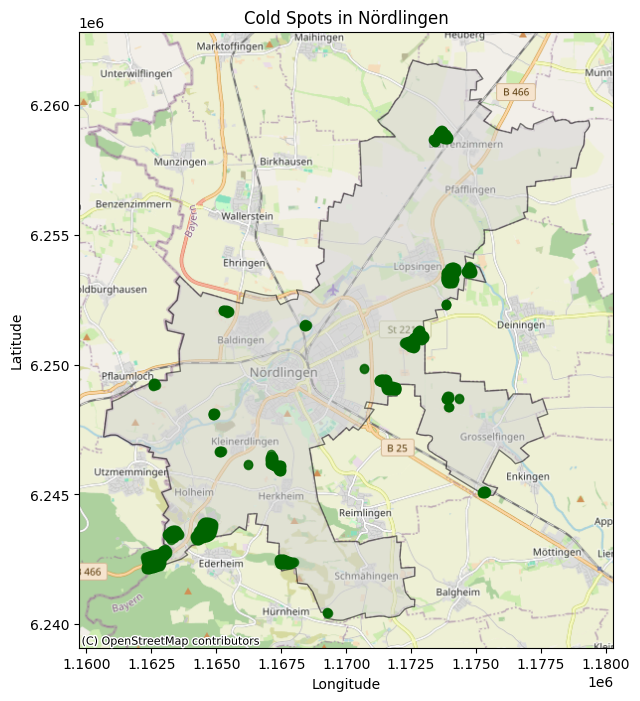

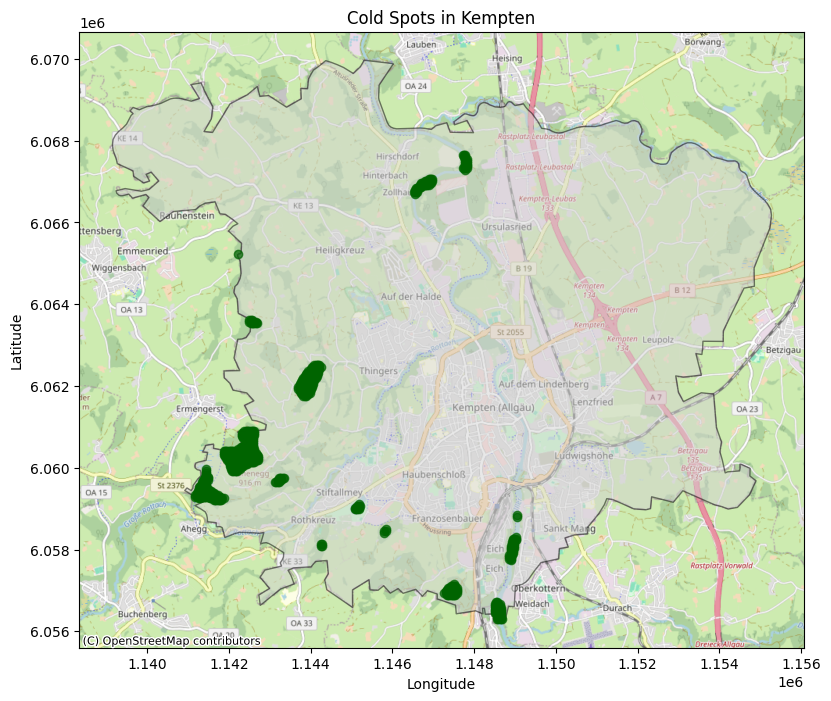

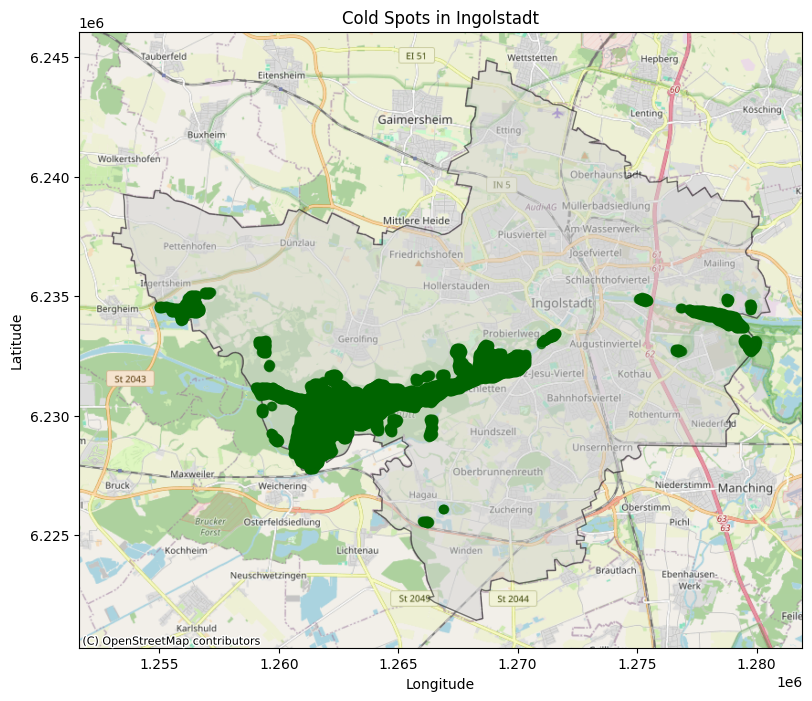

In [ ]:
# auf Karte darstellen

# 1. Load administrative boundaries (replace with your file paths)
boundary_noerdlingen = gpd.read_file("/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp")
boundary_kempten = gpd.read_file("/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp")
boundary_ingolstadt = gpd.read_file("/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp")

# 2. Ensure CRS consistency
desired_crs = "EPSG:3857"  # Web Mercator for contextily

boundary_noerdlingen = boundary_noerdlingen.to_crs(desired_crs)
boundary_kempten = boundary_kempten.to_crs(desired_crs)
boundary_ingolstadt = boundary_ingolstadt.to_crs(desired_crs)

# 3. Load cold spot polygons
cold_spots_noerdlingen = gpd.read_file("Noerdlingen_ColdSpots_Polygon.geojson")
cold_spots_kempten = gpd.read_file("Kempten_ColdSpots_Polygon.geojson")
cold_spots_ingolstadt = gpd.read_file("Ingolstadt_ColdSpots_Polygon.geojson")

# Ensure cold spot polygons have the correct CRS
cold_spots_noerdlingen = cold_spots_noerdlingen.to_crs(desired_crs)
cold_spots_kempten = cold_spots_kempten.to_crs(desired_crs)
cold_spots_ingolstadt = cold_spots_ingolstadt.to_crs(desired_crs)

def plot_coldspots_on_map(cold_spots_gdf, boundary_gdf, city_name):
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot boundary with light gray fill and black edge
    boundary_gdf.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)

    # Plot cold spots with dark green fill and some transparency
    cold_spots_gdf.plot(ax=ax, color="darkgreen", alpha=0.7)

    # Add basemap using contextily
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

    plt.title(f"Cold Spots in {city_name}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

# Plot for each city
plot_coldspots_on_map(cold_spots_noerdlingen, boundary_noerdlingen, "Nördlingen")
plot_coldspots_on_map(cold_spots_kempten, boundary_kempten, "Kempten")
plot_coldspots_on_map(cold_spots_ingolstadt, boundary_ingolstadt, "Ingolstadt")

# NDVI berechnen und mit Cold Spots vergleichen

In [ ]:
%pip install pycrs

  Preparing metadata (setup.py) ... done
  Created wheel for pycrs: filename=PyCRS-1.0.2-py3-none-any.whl size=32687 sha256=295939b8688645895ed77a8032f6c506c82061fea3b94efb19fa13226790c20d
  Stored in directory: /root/.cache/pip/wheels/5f/ad/a3/183ed754d7698fc15a2eb153705e05d05a0d97f3331293ce48
Successfully built pycrs


In [ ]:
# Shapefiles laden
cities = {
    "Nördlingen": "/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Nördlingen_Gerenze_shp.shp",
    "Kempten": "/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Kempten (Allgäu) .shp",
    "Ingolstadt": "/content/drive/MyDrive/Daten BA /Shapefile_Zensus2022/EPSG_25832/Ingolstadt .shp"
}

# Zeitraum definieren
start_date = '2022-06-01'
end_date = '2022-08-31'

def calculate_ndvi(city_name, shapefile_path):
    # Shapefile als Earth Engine FeatureCollection laden
    try:
        city_boundary = geemap.shp_to_ee(shapefile_path)
    except Exception as e:
        print(f"Error loading shapefile for {city_name}: {e}")
        return None  # oder eine andere geeignete Fehlerbehandlung

    # Check if city_boundary is valid before proceeding
    if city_boundary is None:
        print(f"Skipping NDVI calculation for {city_name} due to shapefile loading error.")
        return None

    # Landsat 8 Bildsammlung filtern
    landsat8 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
        .filterBounds(city_boundary) \
        .filterDate(start_date, end_date) \
        .filter(ee.Filter.lt('CLOUD_COVER', 5))

    # Funktion zum Hinzufügen des NDVI zu jedem Bild
    def add_ndvi(image):
        ndvi = image.normalizedDifference(['SR_B5', 'SR_B4']).rename('NDVI')
        return image.addBands(ndvi)

    # NDVI zu jedem Bild hinzufügen
    landsat8_with_ndvi = landsat8.map(add_ndvi)

    # Mittleren NDVI für den Zeitraum berechnen
    median_ndvi = landsat8_with_ndvi.select('NDVI').median()

    # NDVI auf das Stadtgebiet beschränken
    median_ndvi_clipped = median_ndvi.clip(city_boundary)

    return median_ndvi_clipped

# Create a single map for all cities
Map = geemap.Map()

# NDVI für jede Stadt berechnen und zur Karte hinzufügen
for city_name, shapefile_path in cities.items():
    ndvi_image = calculate_ndvi(city_name, shapefile_path)
    if ndvi_image:
        # Define visualization parameters with a custom color palette
        vis_params = {
            'min': 0,
            'max': 1,
            'palette': ['red', 'orange', 'yellow', 'green', 'darkgreen']  # NDVI color palette
        }
        Map.addLayer(ndvi_image, vis_params, f'Median NDVI - {city_name}')


Map.addLayerControl()
Map  # Automatische Anzeige im Colab Notebook

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…